In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('chip_data.csv')

In [3]:
df.head()

,test_A,test_B,label
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


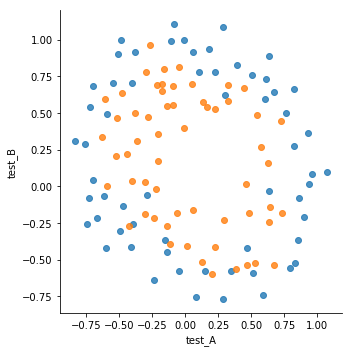

In [4]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="test_A", y="test_B", data=df, fit_reg=False,hue = 'label' ,legend=False)
plt.show()

In [5]:
#Training and labels
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [6]:
X.insert(loc = 0,column = 'bias',value=np.ones(X.shape[0]))

In [7]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [8]:
w = np.random.normal(0,1,X.shape[1])

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [11]:
def loss(y,hx):
    return ((-y * np.log(hx)) - (1-y) * np.log(1-hx)).mean()

In [23]:
def newton(w,epochs):
    weights = []
    errors = []
    w = w.reshape(-1,1)
    for i in range(epochs):
        pred = np.dot(X_train,w)
        print(pred.shape)
        h = sigmoid(pred)
        #h = h.reshape(-1,1)
        a = h*(1-h)*X_train
        error = loss(Y_train.values.reshape(-1,1),h)
        print(error)
        grad = np.dot(X_train.T,h- Y_train.values.reshape(-1,1))
        hess = a.T @ X_train
        weights.append(w)
        errors.append(error)
        w = w - np.matmul(np.linalg.pinv(hess),grad);
    return weights,errors

In [25]:
theta,cost = newton(w,10)

(82, 1)
0.7446364477659901
(82, 1)
0.6875571185354759
(82, 1)
0.6858276416762066
(82, 1)
0.6858275341636849
(82, 1)
0.6858275341636842
(82, 1)
0.6858275341636842
(82, 1)
0.6858275341636842
(82, 1)
0.6858275341636842
(82, 1)
0.6858275341636842
(82, 1)
0.6858275341636842


In [26]:
print(cost)

[0.7446364477659901, 0.6875571185354759, 0.6858276416762066, 0.6858275341636849, 0.6858275341636842, 0.6858275341636842, 0.6858275341636842, 0.6858275341636842, 0.6858275341636842, 0.6858275341636842]


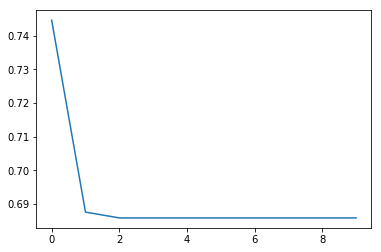

In [27]:
plt.plot(cost)

In [28]:
theta = theta[-1]
theta

array([[ 4.67160668e-04],
       [-4.84688471e-01],
       [-7.17980875e-02]])

In [30]:
theta.reshape(-1,)

array([ 4.67160668e-04, -4.84688471e-01, -7.17980875e-02])

Text(0,0.5,'value of cost')

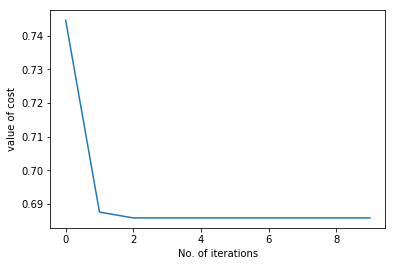

In [31]:
plt.plot(cost)
plt.xlabel("No. of iterations")
plt.ylabel("value of cost")

In [32]:
def pred(data):
    return sigmoid(np.dot(data,theta))

In [33]:
a = pred(X_test)

In [45]:
a = a.reshape(-1,)

In [46]:
a = a >= 0.5

In [47]:
pred = pd.DataFrame(data = {"label":a}).astype(int)

In [44]:
a.shape

(36, 1)

In [48]:
Y_test = Y_test.reset_index(drop=True)

In [49]:
predicted_data = pd.concat([pred,pd.DataFrame({"Actual_label":Y_test})],axis = 1)

In [50]:
predicted_data.head()

,label,Actual_label
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [51]:
accuracy = 1 - np.sum(abs(predicted_data['label'] - predicted_data['Actual_label']))/predicted_data.shape[0]

In [52]:
print("Accuracy of the model without any parameter tunning is :",accuracy)

Accuracy of the model without any parameter tunning is : 0.5


In [53]:
plot_data = pd.concat([X,Y],axis=1)

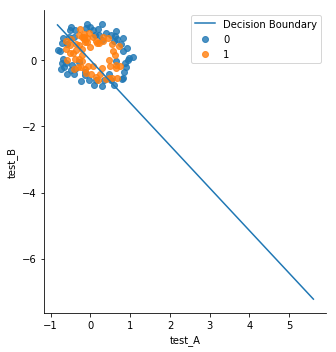

In [54]:
import seaborn as sns 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="test_A", y="test_B", data=plot_data, fit_reg=False,hue = 'label' ,legend=False)
x_0 = min(plot_data['test_A'])
x_1 = max(plot_data['test_A'])

plt.plot([x_0,1 * -(theta[0] + theta[1]* x_0)/theta[2]], [ x_1,1 * -(theta[0] + theta[1]* x_1)/theta[2] ],label = "Decision Boundary")
# Move the legend to an empty part of the plot
plt.legend(loc='best')

1.0709